Algoritmos

In [2]:
'''
Implemente dois algoritmos para obter a mediana de uma lista de elementos. 
Um dos algoritmos deve ser baseado no método força bruta e o outro no método diminuir para conquistar. 
Os dois algoritmos devem ser implementados em Python (sem utilizar nenhuma biblioteca externa). 
Eles devem receber como parâmetro uma lista de elementos e devem retornar a mediana da lista. 
Você também deve montar um experimento que permita comparar o desempenho dos dois algoritmos através de um gráfico. 
Você deve entregar um arquivo no formato PDF, contendo:
1) O código dos dois algoritmos;
1) O valor do domínio;
2) A figura gerada pelo experimento e que permite comparar os dois algoritmos.

'''
def Swap (A,i,j):
    temp=A[i]
    A[i]=A[j]
    A[j]=temp

### Início do Bloco BubbleSort #################################################
def Mediana_BubbleSort(A):
    for i in range(len(A)-1,0,-1):
        for j in range(i):
            if A[i]<A[j]:
                Swap(A,j,i)
    return A[(len(A)-1)//2]     

### Início do Bloco Naive ######################################################     
def Mediana_Naive(A):
    S=sorted(A)
    k=(len(S)-1)//2
    return S[k]

### Início do Bloco QuickSort usando Lomuto ####################################
def LomutoPartition(A,l,r):
    p=A[l]
    s=l
    for i in range(l+1,r+1):
        if A[i]<p:
            s=s+1
            Swap(A,s,i)
    Swap(A,l,s)
    return s

def _QuickSelect(A,l,r,k):
    s=LomutoPartition(A,l,r)
    if(s==k-1):
        return A[s]
    else:
        if(s>k-1):
            return _QuickSelect(A,l,s-1,k)
        else:
            return _QuickSelect(A,s+1,r,k)

def Mediana_QuickSelect(A):
    return _QuickSelect(A,0,len(A)-1,(len(A)+1)//2)
### Fim do Bloco QuickSort usando Lomuto #######################################

In [18]:
### bloco dos testes ###########################################################
#testando...  
print("Testenado...")
import random
vetor = list(range(0,10))
random.shuffle(vetor)
################################################################################
vetor = [8,9,5,7,11,2,1]
L = vetor
print("Lista desordenada..........:", L)
print("")
L.remove
L = vetor #garantindo valores originais da lista
print("QuickSelect desordenada ...:", L)
print("BubbleSort mediana.........:", Mediana_BubbleSort(L))
print("BubbleSort ordenada........:", L)
################################################################################
L.remove
L = vetor #garantindo valores originais da lista
print("QuickSelect desordenada ...:", L)
print("Naive Mediana..............:", Mediana_Naive(L))
print("Naive Ordenada.............:", L)
################################################################################
L.remove
L = vetor
print("QuickSelect desordenada ...:", L)
print("QuickSelect Mediana........:", Mediana_QuickSelect(L))
print("QuickSelect Ordenada.......:", L)

Testenado...
QuickSelect desordenada ...: [8, 9, 5, 7, 11, 2, 1]
QuickSelect Mediana........: 7
QuickSelect Ordenada.......: [1, 2, 5, 7, 8, 9, 11]


Coleta de dados dos experimentos

In [16]:
import time
from numpy import random

def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain,size=tam))
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
  return sum/rounds

#Você deve escolher um domínio mais adequado
DOMAIN = 1000

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 100 

##você deve escolher tamanhos mais adequados
sizes = [500, 1000, 1500, 2000, 2500] 

#defines the algorithms to be processed
algorithms = [Mediana_BubbleSort, Mediana_Naive, Mediana_QuickSelect]

mapSizeToTime = dict()

for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=500
Starting round 2, size=1000
Starting round 3, size=1500
Starting round 4, size=2000
Starting round 5, size=2500
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
Mediana_BubbleSort##500,0.015781,Mediana_BubbleSort,500
Mediana_Naive##500,0.000105,Mediana_Naive,500
Mediana_QuickSelect##500,0.000420,Mediana_QuickSelect,500
Mediana_BubbleSort##1000,0.062586,Mediana_BubbleSort,1000
Mediana_Naive##1000,0.000231,Mediana_Naive,1000
Mediana_QuickSelect##1000,0.000691,Mediana_QuickSelect,1000
Mediana_BubbleSort##1500,0.141503,Mediana_BubbleSort,1500
Mediana_Naive##1500,0.000371,Mediana_Naive,1500
Mediana_QuickSelect##1500,0.001052,Mediana_QuickSelect,1500
Mediana_BubbleSort##2000,0.251490,Mediana_BubbleSort,2000


Resultado do experimento (gráfico)

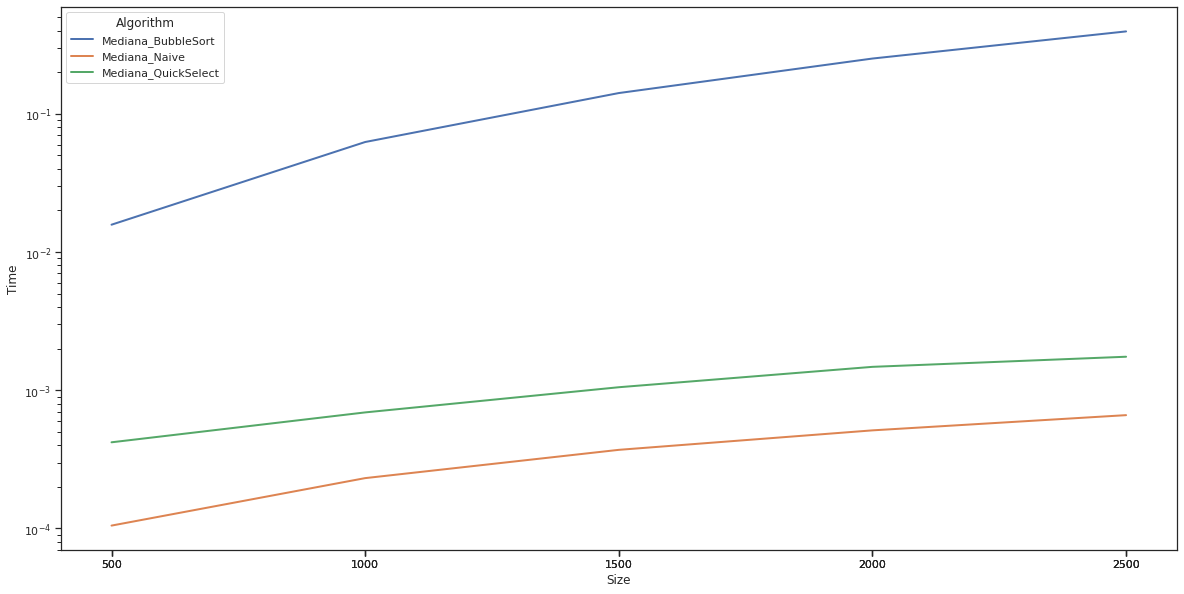

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log') #escala logartimca, mais indicada quando a diferença entre os algoritimos comparados são muito distantes ou muito perto.
g.set(xticks=[i for i in df.Size])
plt.show()